In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, LSTM, MaxPooling2D  # Removed CuDNNLSTM
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

# ... (rest of your code remains the same)
# Set paths to your dataset in /content
train_dir = '/content/dataset/train'  # Path to your train folder
val_dir = '/content/dataset/test'    # Path to your test folder

# Image data generator to augment and normalize the images
image_generator = ImageDataGenerator(
    rescale=1./255,  # Normalize image pixel values to range [0, 1]
    horizontal_flip=True,  # Augment by flipping images horizontally
    vertical_flip=True     # Augment by flipping images vertically
)

# Define the training set using the directory with the images
training_set = image_generator.flow_from_directory(
    batch_size=256,
    directory=train_dir,
    shuffle=True,
    target_size=(48, 48),  # Resize images to 48x48 (or adjust as needed)
    class_mode='categorical',  # Since it's a classification problem
    # color_mode="grayscale"   # Uncomment this if your images are in grayscale
)

# Define the testing set using the directory with the images
testing_set = image_generator.flow_from_directory(
    batch_size=128,
    directory=val_dir,
    shuffle=True,
    target_size=(48, 48),  # Resize images to 48x48 (or adjust as needed)
    class_mode='categorical',  # Since it's a classification problem
    # color_mode="grayscale"   # Uncomment this if your images are in grayscale
)

# Print the class indices to verify the mapping of labels to classes
print(training_set.class_indices)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(
    optimizer = "adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
hist = model.fit(training_set, validation_data=testing_set, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 53s 249ms/step - accuracy: 0.1920 - loss: 8.6465 - val_accuracy: 0.2471 - val_loss: 4.3215
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 50s 135ms/step - accuracy: 0.2631 - loss: 3.3411 - val_accuracy: 0.2471 - val_loss: 3.1750
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.3673 - loss: 2.3181 - val_accuracy: 0.2471 - val_loss: 4.4686
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.4245 - loss: 2.1732 - val_accuracy: 0.3133 - val_loss: 2.4877
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.4544 - loss: 2.1418 - val_accuracy: 0.3736 - val_loss: 2.3701


In [20]:
hist = hist.history

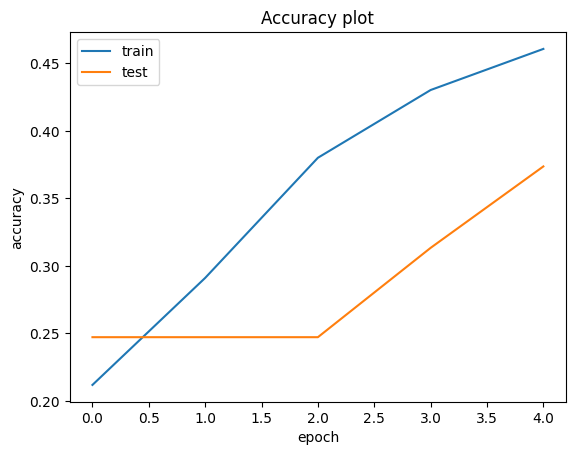

In [21]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("CNNv2_accuracy.png")

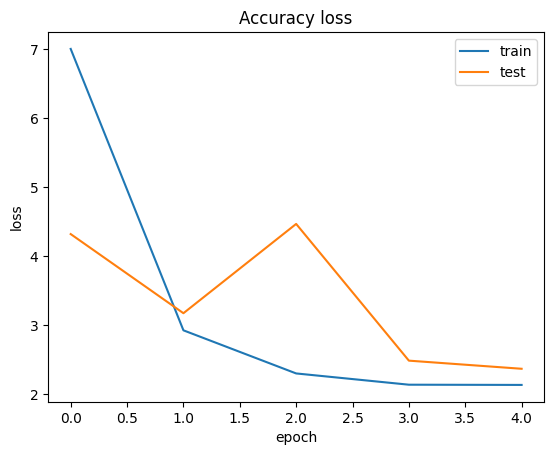

In [22]:

plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("CNNv2_loss.png")

In [23]:
model.save("CNNv2.h5")